---

<div align="left">
<p><img alt="AMVA" height="140px" src="https://www.metropol.gov.co/Style%20Library/images/logo-area.png" align="left" hspace="10px" vspace="0px"></p></div>
<div> </div>
<div align="right">
<p><img alt="Catastro" height="140px" src="https://www.metropol.gov.co/administrativa-financiera/PublishingImages/Paginas/gestion-catastral/servicios/catastro_area_metropolitana_web.jpg" align="right" hspace="10px" vspace="10px"></p></div>
<br></br>
<br></br>
<br></br>
<br></br>
<p>
<h1> <b>Análisis de Lotes del AMVA</b> </h1>
<hr size=10 noshade color="green">
</p>
<p>
<img alt="CC" height="70px" src="https://creativecommons.org/images/deed/cc_blue_x2.png" align="left" hspace="0px" vspace="0px">
<img alt="Attribution" height="70px" src="https://creativecommons.org/images/deed/attribution_icon_blue_x2.png" align="left" hspace="0px" vspace="0px">
<img alt="NC" height="70px" src="https://creativecommons.org/images/deed/nc_blue_x2.png" align="left" hspace="0px" vspace="0px">
<img alt="SA" height="70px" src="https://creativecommons.org/images/deed/sa_blue_x2.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">
<h1> <b> Por: Julián Andrés Castillo G.</b> </h1>
<strong><a href="mailto:castillojulian@gmail.com"> ✉ Julián Castillo [castillojulian@gmail.com]</a></strong> 
</div>
<div align="right">
<h2> <b> Por: Juan Pablo Barrero Velez</b> </h1>
<strong><a href="mailto:samac1984@gmail.com"> ✉ Juan Pablo Barrero [samac1984@gmail.com]</a></strong> 
</div>
<br>

---

# **Análisis de lotes de predios del Área Metropolitana del Valle de Aburrá**

Un análisis de los lotes de los predios del Área Metropolitana del Valle de Aburrá – Una mirada desde los atributos de la información geográfica (Datos con corte a julio de 2022)

## **Carga de información**

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/ObservatorioTerritorialMetropolitano/AnalisisAreasLote/main/Data.csv'

df = pd.read_csv(url, sep=';')
df.head()

,OBJECTID,Shape_Length,Shape_Area,Suelo,Municipio
0,1,36.782908,75.391901,Urbano,Medellin
1,2,88.939109,300.200446,Urbano,Medellin
2,3,88.577619,293.669242,Urbano,Medellin
3,4,36.513439,74.975491,Urbano,Medellin
4,5,59.395023,149.372524,Urbano,Medellin


---

## **Barbosa**

Figura Barbosa Rural
Figura Barbosa Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf2cead0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf2d2590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf2ce510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf2d9090>],
 'fliers': [],
 'means': []}

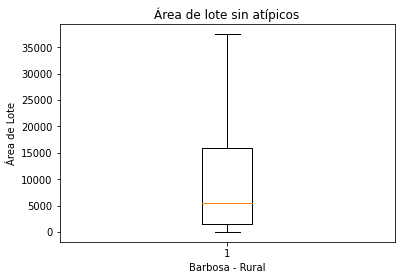

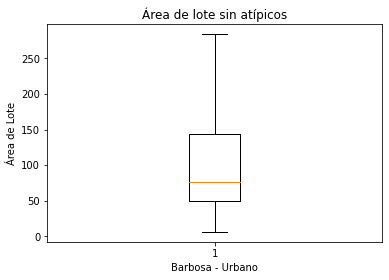

In [91]:
Municipio = 'Barbosa'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura Barbosa Rural')
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura Barbosa Urbano')
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [92]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [9; 1,570] 
Segundo cuartil 	 [1,570; 5,401] 
Tercer cuartil 	 [5,401; 15,983] 
Cuarto cuartil 	 [15,983; 2,197,085]
Cuartiles Urbanos
Primer cuartil 	 [6; 49] 
Segundo cuartil 	 [49; 76] 
Tercer cuartil 	 [76; 143] 
Cuarto cuartil 	 [143; 254,513]


---

## **Bello**

Figura Bello Rural
Figura Bello Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf1ea610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf1700d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf1ea050>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf170b90>],
 'fliers': [],
 'means': []}

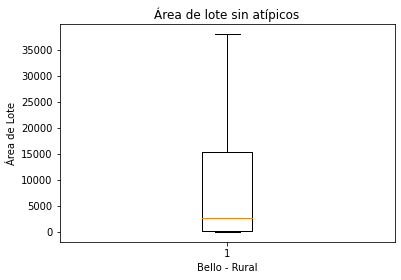

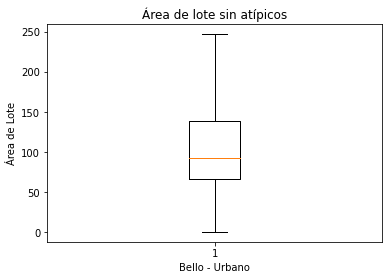

In [93]:
Municipio = 'Bello'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [94]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [9; 233] 
Segundo cuartil 	 [233; 2,709] 
Tercer cuartil 	 [2,709; 15,352] 
Cuarto cuartil 	 [15,352; 5,225,309]
Cuartiles Urbanos
Primer cuartil 	 [0; 67] 
Segundo cuartil 	 [67; 93] 
Tercer cuartil 	 [93; 139] 
Cuarto cuartil 	 [139; 612,297]


---

## **Caldas**

Figura Caldas Rural
Figura Caldas Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf0d1150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf0d1bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf0ccb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf0da6d0>],
 'fliers': [],
 'means': []}

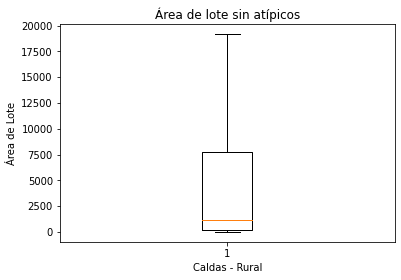

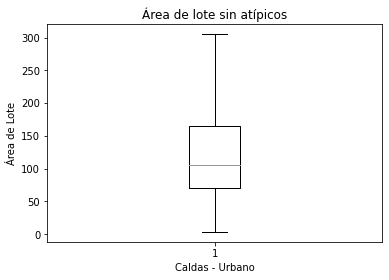

In [95]:
Municipio = 'Caldas'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [96]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [2; 155] 
Segundo cuartil 	 [155; 1,191] 
Tercer cuartil 	 [1,191; 7,761] 
Cuarto cuartil 	 [7,761; 10,728,942]
Cuartiles Urbanos
Primer cuartil 	 [4; 71] 
Segundo cuartil 	 [71; 106] 
Tercer cuartil 	 [106; 164] 
Cuarto cuartil 	 [164; 370,082]


---

## **Copacabana**

Figura Copacabana Rural
Figura Copacabana Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf027d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf02c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf0277d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11befb2350>],
 'fliers': [],
 'means': []}

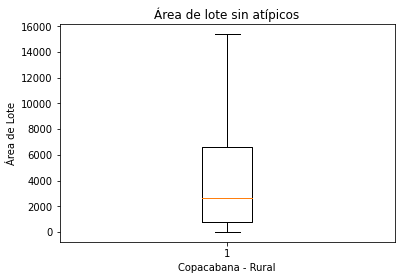

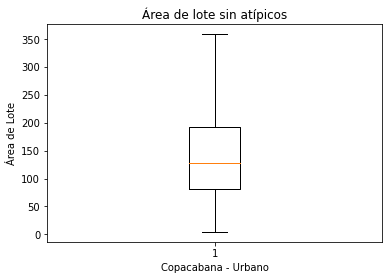

In [97]:
Municipio = 'Copacabana'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [98]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [4; 770] 
Segundo cuartil 	 [770; 2,677] 
Tercer cuartil 	 [2,677; 6,622] 
Cuarto cuartil 	 [6,622; 2,578,887]
Cuartiles Urbanos
Primer cuartil 	 [4; 81] 
Segundo cuartil 	 [81; 127] 
Tercer cuartil 	 [127; 192] 
Cuarto cuartil 	 [192; 156,907]


---

## **Envigado**

Figura Envigado Rural
Figura Envigado Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf206250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf206f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf222dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf1aac50>],
 'fliers': [],
 'means': []}

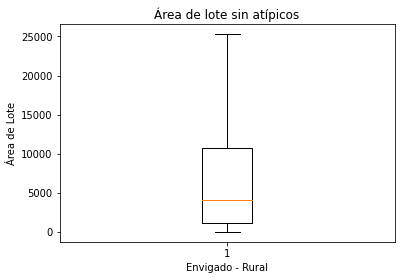

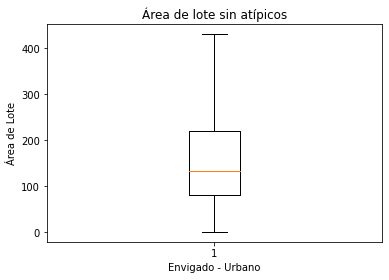

In [99]:
Municipio = 'Envigado'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [100]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [4; 1,086] 
Segundo cuartil 	 [1,086; 4,068] 
Tercer cuartil 	 [4,068; 10,763] 
Cuarto cuartil 	 [10,763; 1,410,068]
Cuartiles Urbanos
Primer cuartil 	 [1; 81] 
Segundo cuartil 	 [81; 133] 
Tercer cuartil 	 [133; 221] 
Cuarto cuartil 	 [221; 194,498]


---

## **Girardota**

Figura Girardota Rural
Figura Girardota Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bef7b250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf394ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf339310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf364790>],
 'fliers': [],
 'means': []}

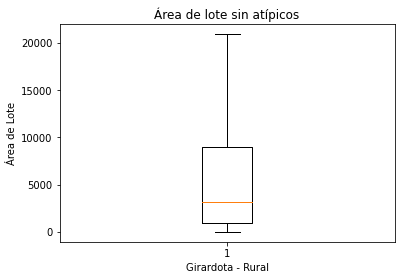

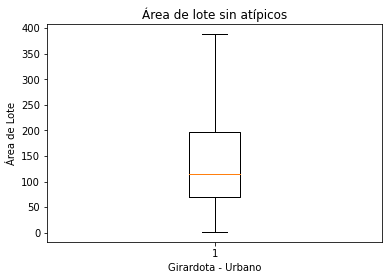

In [101]:
Municipio = 'Girardota'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [102]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [7; 949] 
Segundo cuartil 	 [949; 3,194] 
Tercer cuartil 	 [3,194; 8,939] 
Cuarto cuartil 	 [8,939; 874,093]
Cuartiles Urbanos
Primer cuartil 	 [2; 70] 
Segundo cuartil 	 [70; 116] 
Tercer cuartil 	 [116; 198] 
Cuarto cuartil 	 [198; 650,341]


---

## **Itagui**

Figura Itagui Rural
Figura Itagui Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11c10fdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11c1076a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11c10fd510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11c00b9fd0>],
 'fliers': [],
 'means': []}

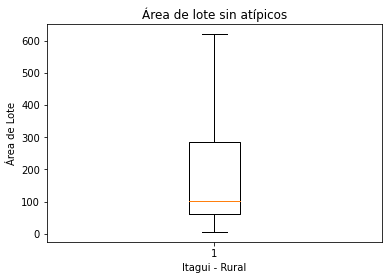

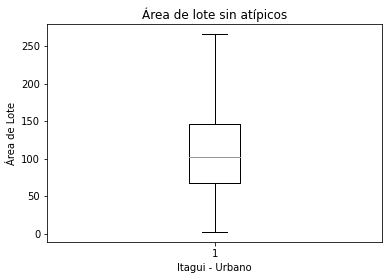

In [103]:
Municipio = 'Itagui'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [104]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [6; 62] 
Segundo cuartil 	 [62; 102] 
Tercer cuartil 	 [102; 286] 
Cuarto cuartil 	 [286; 674,553]
Cuartiles Urbanos
Primer cuartil 	 [2; 67] 
Segundo cuartil 	 [67; 102] 
Tercer cuartil 	 [102; 147] 
Cuarto cuartil 	 [147; 276,269]


---

## **La Estrella**

Figura La Estrella Rural
Figura La Estrella Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf808710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf774290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf808110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf7ff710>],
 'fliers': [],
 'means': []}

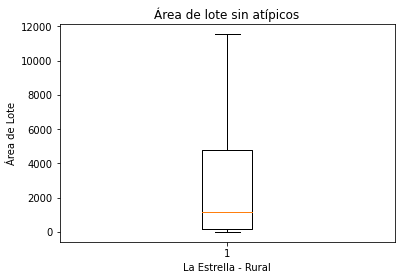

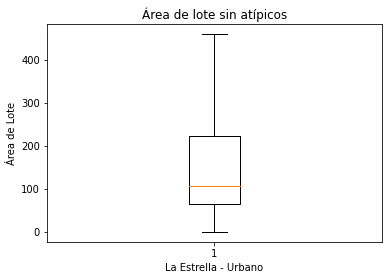

In [105]:
Municipio = 'La Estrella'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [106]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [0; 157] 
Segundo cuartil 	 [157; 1,188] 
Tercer cuartil 	 [1,188; 4,791] 
Cuarto cuartil 	 [4,791; 2,045,708]
Cuartiles Urbanos
Primer cuartil 	 [0; 65] 
Segundo cuartil 	 [65; 106] 
Tercer cuartil 	 [106; 223] 
Cuarto cuartil 	 [223; 99,164]


---

## **Medellín**

Figura Medellin Rural
Figura Medellin Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11bf486890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11bf49af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11bf486f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bf6933d0>],
 'fliers': [],
 'means': []}

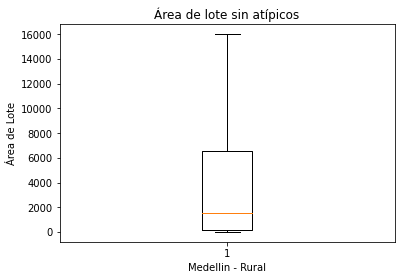

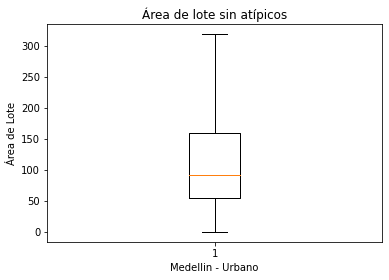

In [107]:
Municipio = 'Medellin'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [108]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [1; 195] 
Segundo cuartil 	 [195; 1,512] 
Tercer cuartil 	 [1,512; 6,523] 
Cuarto cuartil 	 [6,523; 11,137,588]
Cuartiles Urbanos
Primer cuartil 	 [0; 54] 
Segundo cuartil 	 [54; 92] 
Tercer cuartil 	 [92; 160] 
Cuarto cuartil 	 [160; 1,112,809]


---

## **Sabaneta**

Figura Sabaneta Rural
Figura Sabaneta Urbano


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11beefb210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11beefbc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11beef4c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11bef03790>],
 'fliers': [],
 'means': []}

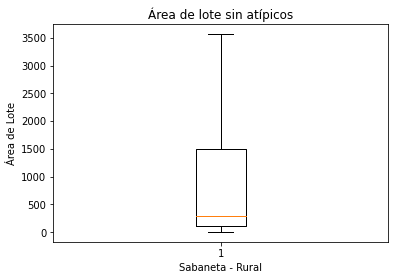

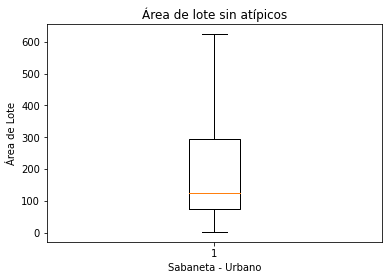

In [109]:
Municipio = 'Sabaneta'
Separador = ' - '
Suelo= 'Rural'

Municipio_ = df[(df['Municipio'] == Municipio)]
MunicipioUrbano = Municipio_[(Municipio_['Suelo'] == 'Urbano')]
MunicipioRural = Municipio_[(Municipio_['Suelo'] == 'Rural')]

MunicipioAreaRural = MunicipioRural[['Shape_Area']].to_numpy()
MunicipioAreaUrbana = MunicipioUrbano[['Shape_Area']].to_numpy()

print('Figura ' + Municipio + ' ' + Suelo)
fig1, ax1 = plt.subplots()
ax1.set_title('Área de lote sin atípicos')
ax1.set_xlabel(Municipio + Separador + Suelo)
ax1.set_ylabel('Área de Lote')
ax1.boxplot(MunicipioAreaRural, showfliers=False)

Suelo = 'Urbano'

print('Figura ' + Municipio + ' ' + Suelo)
fig2, ax2 = plt.subplots()
ax2.set_title('Área de lote sin atípicos')
ax2.set_xlabel(Municipio + Separador + Suelo)
ax2.set_ylabel('Área de Lote')
ax2.boxplot(MunicipioAreaUrbana, showfliers=False)

In [110]:
cuartilesRural = np.quantile(MunicipioAreaRural, [0,0.25,0.5,0.75,1])
cuartilesUrbano = np.quantile(MunicipioAreaUrbana, [0,0.25,0.5,0.75,1])
cuartil = ['Primer Cuartil', 'Segundo Cuartil', 'Tercer Cuartil', 'Cuarto Cuartil']
cuartilesRural = list(cuartilesRural)
cuartilesUrbano = list(cuartilesUrbano)

for i in range(len(cuartilesRural)):
    x = int(round(cuartilesRural[i],0))
    cuartilesRural[i] = x
    y = int(round(cuartilesUrbano[i],0))
    cuartilesUrbano[i] = y
#Impresion del cuartiles
print('Cuartiles Rurales')
CuartilesRurales = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesRural[0], cuartilesRural[1], cuartilesRural[2], cuartilesRural[3], cuartilesRural[4])
print(CuartilesRurales)
print('Cuartiles Urbanos')
CuartilesUrbanos = 'Primer cuartil \t [{0:,.0f}; {1:,.0f}] \nSegundo cuartil \t [{1:,.0f}; {2:,.0f}] \nTercer cuartil \t [{2:,.0f}; {3:,.0f}] \nCuarto cuartil \t [{3:,.0f}; {4:,.0f}]'.format(cuartilesUrbano[0], cuartilesUrbano[1], cuartilesUrbano[2], cuartilesUrbano[3], cuartilesUrbano[4])
print(CuartilesUrbanos)

Cuartiles Rurales
Primer cuartil 	 [5; 111] 
Segundo cuartil 	 [111; 285] 
Tercer cuartil 	 [285; 1,499] 
Cuarto cuartil 	 [1,499; 1,248,122]
Cuartiles Urbanos
Primer cuartil 	 [2; 74] 
Segundo cuartil 	 [74; 126] 
Tercer cuartil 	 [126; 296] 
Cuarto cuartil 	 [296; 70,165]
